# Deteksi Penyakit Jantung dengan Menggunakan Berbagai Model Machine Learning

Dataset yang digunakan diambil dari https://archive.ics.uci.edu/ml/datasets/heart+disease, berisi informasi medis pasien dan hasil diagnosis apakah pasien tersebut mengidap penyakit jantung. Model machine learning diperlukan untuk menentukan apakah seorang pasien menderita penyakit jantung dan mempercepat proses diagnostik berdasarkan informasi medis yang diberikan tentang pasien tersebut.

Model yang akan dieksplorasi:
1. Logistic Regression,
2. K-Nearest Neighbour (KNN),
3. Support Vector Machine (SVM),
4. Gaussian Naive Bayes,
5. Decision Tree,
6. Random Forest,
7. Extra Tree Classifier,
8. Gradient Boosting, and
9. AdaBoost.

**VARIABEL**

- Usia (dalam tahun)
- Jenis kelamin : laki-laki/wanita
- cp (Chest Pain Type) : 0 = typical angina, 1 = atypical angina, 2 = non-anginal pain, 3 = asymptomatic
- trestbps (Resting blood pressure (dalam mm Hg))
- chol (Serum cholestoral (in mg/dl))
- fbs (Fasting blood sugar > 120 mg/dl) : 0 = false, 1 = true
- restecg (Resting electrocardiographic results) : 0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria
- thalach : Denyut jantung maksimum tercapai
- exang (Angina akibat olahraga) : 0 = no, 1 = yes
- oldpeak : Depresi ST disebabkan oleh olahraga dibandingkan istirahat
- slope (Kemiringan puncak latihan segmen ST) : 0 = upsloping, 1 = flat, 2 = downsloping
- ca (Jumlah pembuluh darah besar (0-4) diwarnai dengan flourosopy)
- thal (Thalassemia) : 3 = normal, 6 = fixed defect, 7 = reversable defect
- Target : 0 = not have heart disease, 1 = have heart disease

**Buku ini ditulis oleh:** Ghefira Nur Fatimah Widyasari

**INSTALL DAN IMPORT LIBRARIES**

In [1]:
# Installing Libraries
!pip install ydata-profiling
!pip install pywaffle
!pip install highlight-text
!pip install Pillow

     -------------------------------------- 357.8/357.8 kB 4.5 MB/s eta 0:00:00
     -------------------------------------- 666.2/666.2 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 102.7/102.7 kB 6.2 MB/s eta 0:00:00
     -------------------------------------- 296.5/296.5 kB 6.1 MB/s eta 0:00:00
     -------------------------------------- 300.0/300.0 kB 9.3 MB/s eta 0:00:00
     ---------------------------------------- 4.7/4.7 MB 4.7 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27092 sha256=a2f1476fbabe0943033f850d86f4fb357595e74351b947a1121cfd930002a256
  Stored in directory: c:\users\balittanah\appdata\local\pip\cache\wheels\ea\1c\a8\5cec3479cd45136a7111e2d96aac299b219b199c411665250b
Successfully built htmlmin
     ---------------------------------------- 25.6/25.6 MB 3.6 MB/s eta 0:00:00


In [3]:
!pip install yellowbrick

     -------------------------------------- 282.6/282.6 kB 3.5 MB/s eta 0:00:00


In [4]:
# Importing Libraries
import numpy as np
import pandas as pd
import ydata_profiling
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import warnings
import os
import yellowbrick
import joblib

from ydata_profiling import ProfileReport
from pywaffle import Waffle
from statsmodels.graphics.gofplots import qqplot
from PIL import Image
from highlight_text import fig_text
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, OneHotEncoder 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, accuracy_score
from yellowbrick.classifier import PrecisionRecallCurve, ROCAUC, ConfusionMatrix
from yellowbrick.model_selection import LearningCurve, FeatureImportances
from yellowbrick.contrib.wrapper import wrap
from yellowbrick.style import set_palette

In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

**MEMBACA DATASET**

In [6]:
clr = {
    'start': '\033[91m',
    'end': '\033[0m',
    'color': '\033[96m'
}

df = pd.read_csv("heart.csv")

# Reading Train Dataset
print(clr['start'] + '.: Imported Dataset :.' + clr['end'])
print(clr['color'] + '*' * 23)
df.head().style.background_gradient(cmap='Reds').hide_index()

.: Imported Dataset :.
***********************


C:\Users\BALITTANAH\AppData\Local\Temp\ipykernel_12584\868695168.py:12: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  df.head().style.background_gradient(cmap='Reds').hide_index()


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
63,1,3,145,233,1,0,150,0,2.300000,0,0,1,1
37,1,2,130,250,0,1,187,0,3.500000,0,0,2,1
41,0,1,130,204,0,0,172,0,1.400000,2,0,2,1
56,1,1,120,236,0,1,178,0,0.800000,2,0,2,1
57,0,0,120,354,0,1,163,1,0.600000,2,0,2,1


In [10]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


**EKSPLORASI DATA**

In [9]:
# Assuming you want to set color_line to a specific color code
color_line = '#FF5733' 

# Now you can use color_line in your ProfileReport call
ProfileReport(df, title='Heart Disease Dataset Report', minimal=True, progress_bar=False, samples=None, correlations=None, interactions=None, explorative=True, dark_mode=True, notebook={'iframe':{'height': '600px'}}, html={'style':{'primary_color': color_line}}, missing_diagrams={'heatmap': False, 'dendrogram': False}).to_notebook_iframe()

In [17]:
%matplotlib inline

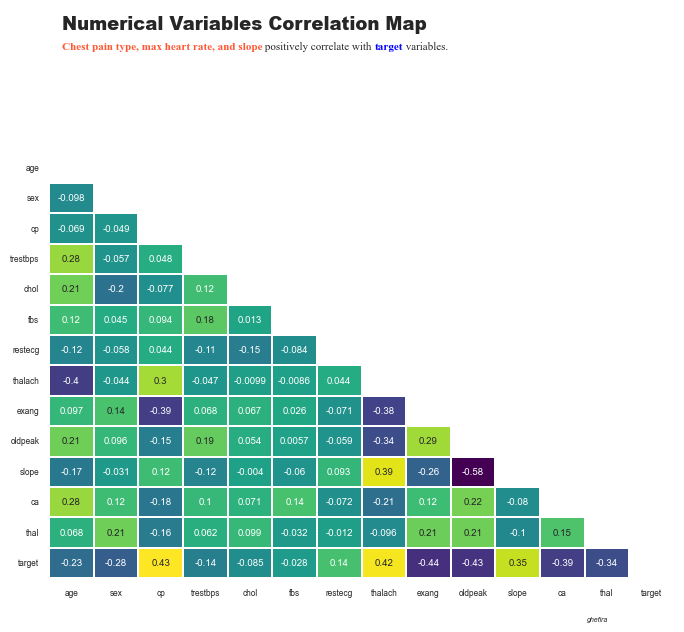

In [75]:
font_main = 'Arial' 
font_alt = 'Times New Roman' 

# Define your colors
colors = ['#FF5733', '#00FF00', '#0000FF']

# Correlation Map Variables 
suptitle = dict(x=0.1, y=1.01, fontsize=13, weight='heavy', ha='left', va='bottom', fontname=font_main)
title = dict(x=0.1, y=0.98, fontsize=8, weight='normal', ha='left', va='bottom', fontname=font_alt)
xy_label = dict(size=6)
highlight_textprops = [{'weight':'bold', 'color': colors[0]}, {'weight':'bold', 'color': colors[2]}]

# Define your color map
color_map = 'viridis' 

# Correlation Map (Heatmap) 
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
fig, ax = plt.subplots(figsize=(7, 6))
sns.heatmap(df.corr(), mask=mask, annot=True, cmap=color_map, linewidths=0.2, cbar=False, annot_kws={"size": 7}, rasterized=True)
yticks, ylabels = plt.yticks()
xticks, xlabels = plt.xticks()
ax.set_xticklabels(xlabels, rotation=0, **xy_label)
ax.set_yticklabels(ylabels, **xy_label)
ax.grid(False)
fig_text(s='Numerical Variables Correlation Map', **suptitle)
fig_text(s='<Chest pain type, max heart rate, and slope> positively correlate with <target> variables.', highlight_textprops=highlight_textprops, **title)
plt.tight_layout(rect=[0, 0.04, 1, 1.01])
plt.gcf().text(0.85, 0.03, 'ghefira', style='italic', fontsize=5)
plt.show()

Dari laporan dataset dan matriks korelasi, dapat disimpulkan bahwa:

1. Tidak terdapat nilai yang hilang dalam dataset. Selain itu, terlihat bahwa jumlah kolom kategori lebih banyak daripada kolom numerik.
2. Jumlah pasien pria lebih banyak daripada pasien wanita. Selain itu, jenis nyeri dada tipe 0 (typical angina) lebih tinggi dibandingkan tipe lainnya. Sebagian besar pasien dalam dataset memiliki kadar gula darah puasa kurang dari 120 mg/dl. Jumlah pasien dengan jenis elektrokardiogram istirahat tipe 1 (mengalami abnormalitas gelombang ST-T) dan 0 (normal) lebih banyak daripada tipe 2 (hipertrofi ventrikel kiri yang pasti). Selain itu, pasien yang tidak mengalami angina yang dipicu oleh latihan memiliki jumlah yang lebih tinggi. Jumlah pasien dengan kemiringan datar dan menurun lebih banyak daripada kemiringan naik.
3. Selanjutnya, pasien dengan 0 pembuluh darah utama lebih banyak daripada yang memiliki pembuluh darah utama. Pasien dengan thalassemia cacat tetap memiliki distribusi tertinggi dibandingkan yang lain. Jumlah total pasien dengan heart disease lebih tinggi daripada yang tidak memiliki heart disease.
4. Kolom usia, tekanan darah istirahat, kolesterol, dan maks. denyut jantung menerima kolom kurang variasi karena memiliki deviasi standar yang rendah.
5. Kolom usia memiliki distribusi normal berdasarkan histogram dan nilai skewness. Namun, kolom tekanan darah istirahat memiliki distribusi yang cukup condong ke kanan dan kolom kolesterol serum dan oldpeak memiliki distribusi yang sangat condong ke kanan. Di sisi lain, kolom maks. denyut jantung memiliki distribusi yang cukup condong ke kiri. Karena beberapa kolom cukup condong ke kiri atau kanan, beberapa pencilan terdeteksi di ekor distribusi.
6. Kolom usia, tekanan darah istirahat, maks. denyut jantung, dan oldpeak memiliki nilai kurtosis kurang dari 3, yang menunjukkan bahwa kolom tersebut platikurtik. Sementara itu, kolom kolesterol serum memiliki nilai kurtosis lebih dari 3, yang menunjukkan bahwa kolom tersebut leptokurtik.
7. Rata-rata usia pasien dalam dataset adalah 54,36 tahun, dengan pasien tertua berusia 77 tahun dan yang termuda berusia 29 tahun. Rata-rata tekanan darah istirahat dalam dataset adalah 131,62, di mana tekanan darah istirahat tertinggi adalah 200 dan yang terendah adalah 94 (secara umum, rentang tekanan darah ideal adalah 90 hingga 120).
8. Rata-rata kolesterol serum adalah 246,26, dengan maksimum 564 dan minimum 126. Selain itu, rata-rata denyut jantung maksimal pasien dalam dataset adalah 149,64, dengan minimum 71 dan maksimum 202. Rata-rata oldpeak pasien adalah 1,03, dengan minimum 0 dan maksimum 6,2.
9. Berdasarkan korelasi antar variabel, dapat dilihat bahwa jenis nyeri dada, maks. denyut jantung, dan kemiringan memiliki korelasi positif tinggi dengan variabel target. Namun, exang, oldpeak, dan thalassemia berkorelasi negatif dengan variabel target.

**PREPROCESSING DATA**

**Features Separating and Splitting**

Pada bagian ini, kolom 'target' (dependen) akan dipisahkan dari kolom independen. Data akan dibagi dengan rasio 80:20 (80% training dan 20% testing).

In [25]:
# Seperating Dependent Features 
x = df.drop(['target'], axis=1)
y = df['target']

# Splitting Dataset 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

**Processing Pipeline**

Pada bagian ini akan dibuat suatu alur kerja pra-pemrosesan data untuk kolom-kolom numerik dan kategorik, dan kemudian menerapkannya pada data x_train dan x_test. Tidak semua kolom akan melalui proses pra-pemrosesan. Untuk semua kolom numerik, dilakukan skalasi menggunakan metode robust scaler karena dataset yang digunakan termasuk kecil dan keberadaan pencilan secara dramatis mempengaruhi kinerja model. Sementara itu, untuk kolom kategorik dengan lebih dari dua kategori, dilakukan one-hot encoding.

In [26]:
# Numerical Pipeline
num_column = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
num_pipeline = Pipeline([
    ('scaling', RobustScaler())
])

# Categorical Pipeline
cat_column = ['cp', 'slope', 'thal']
cat_pipeline = Pipeline([
    ('onehot', OneHotEncoder(drop='first', sparse=False))
])

# Combine Both Pipelines into Transformer
preprocessor = ColumnTransformer([
    ('categorical', cat_pipeline, cat_column)
    , ('numerical', num_pipeline, num_column)]
    , remainder='passthrough')

# Apply Transformer to Pipeline
process_pipeline = Pipeline([
    ('preprocessor', preprocessor)
])

# Apply to Dataframe 
x_train_process = process_pipeline.fit_transform(x_train)
x_test_process = process_pipeline.fit_transform(x_test)

C:\Users\BALITTANAH\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\BALITTANAH\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


**IMPLEMENTASI MODEL 1 - LOGISTIC REGRESSION**

Regresi logistik adalah metode statistik yang digunakan untuk membangun model machine learning di mana variabel dependen bersifat dikotomis, artinya hanya memiliki dua kategori, yaitu biner. Regresi logistik digunakan untuk menjelaskan data dan hubungan antara satu variabel dependen dengan satu atau lebih variabel independen. Variabel independen dapat berupa nominal, ordinal, atau tipe interval.

Nama "regresi logistik" berasal dari konsep fungsi logistik yang digunakan oleh metode ini. Fungsi logistik ini juga dikenal sebagai fungsi sigmoid. Nilai dari fungsi logistik ini berkisar antara nol dan satu.

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the function for fitting ML models
def fit_ml_models(model, parameters, model_name, x_train, y_train, x_test, y_test):
    grid = GridSearchCV(estimator=model, param_grid=parameters, scoring='accuracy', cv=5, n_jobs=-1)
    grid_result = grid.fit(x_train, y_train)
    best_params = grid_result.best_params_
    train_score = grid_result.score(x_train, y_train)
    test_score = grid_result.score(x_test, y_test)

    print(f"{model_name} - Best Parameters: {best_params}")
    print(f"{model_name} - Training Accuracy: {train_score:.4f}")
    print(f"{model_name} - Test Accuracy: {test_score:.4f}")

    return grid_result, train_score, test_score, best_params

# Logistic Regression Parameters
parameter_lr = {"solver": ["lbfgs", "saga", "newton-cg"], "C": [0.1, 0.2, 0.5, 0.8]}

# Logistic Regression Algorithm
algo_lr = LogisticRegression(penalty="l2", random_state=42, n_jobs=-1)

# Applying Logistic Regression
grid_result, acc_score_train_lr, acc_score_test_lr, best_score_lr = fit_ml_models(algo_lr, parameter_lr, "Logistic Regression", x_train, y_train, x_test, y_test)

# Get predictions on the test set
y_pred_lr = grid_result.best_estimator_.predict(x_test)

# Create and print the classification report
classification_rep = classification_report(y_test, y_pred_lr)
print("Classification Report:")
print(classification_rep)

Logistic Regression - Best Parameters: {'C': 0.2, 'solver': 'lbfgs'}
Logistic Regression - Training Accuracy: 0.8595
Logistic Regression - Test Accuracy: 0.8852
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [40]:
# Display additional metrics
conf_matrix = confusion_matrix(y_test, y_pred_lr)
accuracy = accuracy_score(y_test, y_pred_lr)
precision = precision_score(y_test, y_pred_lr)
recall = recall_score(y_test, y_pred_lr)
f1 = f1_score(y_test, y_pred_lr)

print("\nConfusion Matrix:")
print(conf_matrix)

print("\nAdditional Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Confusion Matrix:
[[25  4]
 [ 3 29]]

Additional Metrics:
Accuracy: 0.8852
Precision: 0.8788
Recall: 0.9062
F1 Score: 0.8923


**IMPLEMENTASI MODEL 2 - K-Nearest Neighbour (KNN)**

Algoritma k-Nearest Neighbors (KNN) merupakan metode klasifikasi data yang digunakan untuk memperkirakan kemungkinan suatu titik data menjadi anggota satu kelompok atau kelompok lainnya berdasarkan kelompok yang dimiliki oleh titik data yang terdekat dengannya. Algoritma k-Nearest Neighbors adalah jenis algoritma pembelajaran mesin yang bersifat supervisi, digunakan untuk memecahkan masalah klasifikasi dan regresi.

Algoritma ini disebut sebagai algoritma pembelajaran malas atau lazy learner karena tidak melakukan pelatihan saat Anda menyediakan data pelatihan. Sebaliknya, ia hanya menyimpan data selama waktu pelatihan dan tidak melakukan perhitungan apapun. Algoritma ini tidak membangun model sampai sebuah kueri dilakukan pada dataset. Hal ini membuat KNN ideal untuk penambangan data.

In [43]:
from sklearn.metrics import classification_report

# KNN Parameters 
parameter_knn = {"n_neighbors": [2, 5, 10, 17], "leaf_size": [1, 10, 11, 30]}

# KNN Algorithm
algo_knn = KNeighborsClassifier(n_jobs=-1)

# Applying KNN
grid_result_knn, acc_score_train_knn, acc_score_test_knn, best_score_knn = fit_ml_models(algo_knn, parameter_knn, "K-Nearest Neighbour (KNN)", x_train, y_train, x_test, y_test)

# Get predictions on the test set
y_pred_knn = grid_result_knn.best_estimator_.predict(x_test)

# Create and print the classification report
classification_rep_knn = classification_report(y_test, y_pred_knn)
print("Classification Report for K-Nearest Neighbors (KNN):")
print(classification_rep_knn)

K-Nearest Neighbour (KNN) - Best Parameters: {'leaf_size': 1, 'n_neighbors': 5}
K-Nearest Neighbour (KNN) - Training Accuracy: 0.7603
K-Nearest Neighbour (KNN) - Test Accuracy: 0.6885
Classification Report for K-Nearest Neighbors (KNN):
              precision    recall  f1-score   support

           0       0.69      0.62      0.65        29
           1       0.69      0.75      0.72        32

    accuracy                           0.69        61
   macro avg       0.69      0.69      0.69        61
weighted avg       0.69      0.69      0.69        61



In [44]:
# Display additional metrics
conf_matrix = confusion_matrix(y_test, y_pred_knn)
accuracy = accuracy_score(y_test, y_pred_knn)
precision = precision_score(y_test, y_pred_knn)
recall = recall_score(y_test, y_pred_knn)
f1 = f1_score(y_test, y_pred_knn)

print("\nConfusion Matrix:")
print(conf_matrix)

print("\nAdditional Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Confusion Matrix:
[[18 11]
 [ 8 24]]

Additional Metrics:
Accuracy: 0.6885
Precision: 0.6857
Recall: 0.7500
F1 Score: 0.7164


**IMPLEMENTASI MODEL 3 - Support Vector Machine (SVM)**

Support Vector Machine (SVM) adalah salah satu algoritma Supervised Learning yang paling populer, digunakan untuk masalah Klasifikasi maupun Regresi. Tujuan dari algoritma SVM adalah menciptakan garis atau batas keputusan terbaik yang dapat memisahkan ruang berdimensi n menjadi kelas-kelas sehingga kita dapat dengan mudah menempatkan titik data baru ke dalam kategori yang benar di masa depan. Batas keputusan terbaik ini disebut hiperplane.

SVM memilih titik-titik/vektor ekstrim yang membantu dalam membuat hiperplane. Kasus-kasus ekstrim ini disebut sebagai vektor dukungan (support vectors), dan oleh karena itu, algoritma ini disebut sebagai Support Vector Machine.

In [45]:
from sklearn.metrics import classification_report

# SVM Parameters
parameter_svc = [
    {'kernel': ['rbf'], 'gamma': np.arange(0.1, 1, 0.1), 'C': np.arange(0.1, 1, 0.1)},
    {'kernel': ['linear'], 'C': np.arange(0.1, 1, 0.1)},
    {'kernel': ['poly'], 'degree' : np.arange(1, 10, 1), 'C': np.arange(0.1, 1, 0.1)}
]

# SVM Algorithm
algo_svc = SVC(random_state=1, probability=True)

# Applying SVM
grid_result_svc, acc_score_train_svc, acc_score_test_svc, best_score_svc = fit_ml_models(algo_svc, parameter_svc, "Support Vector Machine (SVM)", x_train, y_train, x_test, y_test)

# Get predictions on the test set
y_pred_svc = grid_result_svc.best_estimator_.predict(x_test)

# Create and print the classification report
classification_rep_svc = classification_report(y_test, y_pred_svc)
print("Classification Report for Support Vector Machine (SVM):")
print(classification_rep_svc)

Support Vector Machine (SVM) - Best Parameters: {'C': 0.2, 'kernel': 'linear'}
Support Vector Machine (SVM) - Training Accuracy: 0.8512
Support Vector Machine (SVM) - Test Accuracy: 0.8852
Classification Report for Support Vector Machine (SVM):
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [46]:
# Display additional metrics
conf_matrix = confusion_matrix(y_test, y_pred_svc)
accuracy = accuracy_score(y_test, y_pred_svc)
precision = precision_score(y_test, y_pred_svc)
recall = recall_score(y_test, y_pred_svc)
f1 = f1_score(y_test, y_pred_svc)

print("\nConfusion Matrix:")
print(conf_matrix)

print("\nAdditional Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Confusion Matrix:
[[25  4]
 [ 3 29]]

Additional Metrics:
Accuracy: 0.8852
Precision: 0.8788
Recall: 0.9062
F1 Score: 0.8923


**IMPLEMENTASI MODEL 4 - Gaussian Naive Bayes**

Klasifikasi Naive Bayes didasarkan pada Teorema Bayes, di mana salah satu asumsi yang diambil adalah asumsi independensi kuat antara fitur-fitur. Klasifikasi ini mengasumsikan bahwa nilai dari suatu fitur tertentu bersifat independen dari nilai fitur lainnya. Dalam situasi pembelajaran terawasi, Klasifikasi Naive Bayes dilatih dengan sangat efisien. Klasifikasi Naive Bayes membutuhkan data pelatihan yang kecil untuk mengestimasi parameter yang diperlukan untuk klasifikasi. Klasifikasi Naive Bayes memiliki desain dan implementasi yang sederhana, dan dapat diterapkan pada banyak situasi kehidupan nyata.

Gaussian Naive Bayes adalah varian dari Naive Bayes yang mengikuti distribusi normal Gaussian dan mendukung data kontinu. Ketika bekerja dengan data kontinu, asumsi yang sering diambil adalah bahwa nilai-nilai kontinu yang terkait dengan setiap kelas didistribusikan sesuai dengan distribusi normal (atau Gaussian).

In [49]:
from sklearn.metrics import classification_report

# Define the function for fitting ML models
def fit_ml_models(model, parameters, model_name, x_train, y_train, x_test, y_test):
    grid = GridSearchCV(estimator=model, param_grid=parameters, scoring='accuracy', cv=5, n_jobs=-1)
    grid_result = grid.fit(x_train, y_train)
    best_params = grid_result.best_params_
    train_score = grid_result.score(x_train, y_train)
    test_score = grid_result.score(x_test, y_test)

    print(f"{model_name} - Best Parameters: {best_params}")
    print(f"{model_name} - Training Accuracy: {train_score:.4f}")
    print(f"{model_name} - Test Accuracy: {test_score:.4f}")

    return train_score, test_score, best_params, grid_result

# Gaussian NB Parameters
parameter_gnb = {"var_smoothing": [1e-2, 1e-3, 1e-4, 1e-6]}

# Gaussian NB Algorithm
algo_gnb = GaussianNB()

# Applying Gaussian NB
acc_score_train_gnb, acc_score_test_gnb, best_score_gnb, grid_result_gnb = fit_ml_models(algo_gnb, parameter_gnb, "Gaussian Naive Bayes", x_train, y_train, x_test, y_test)

# Get predictions on the test set
y_pred_gnb = grid_result_gnb.predict(x_test)  # Menggunakan grid_result untuk prediksi

# Create and print the classification report
classification_rep_gnb = classification_report(y_test, y_pred_gnb)
print(classification_rep_gnb)

Gaussian Naive Bayes - Best Parameters: {'var_smoothing': 0.0001}
Gaussian Naive Bayes - Training Accuracy: 0.8182
Gaussian Naive Bayes - Test Accuracy: 0.8525
              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [50]:
# Display additional metrics
conf_matrix = confusion_matrix(y_test, y_pred_gnb)
accuracy = accuracy_score(y_test, y_pred_gnb)
precision = precision_score(y_test, y_pred_gnb)
recall = recall_score(y_test, y_pred_gnb)
f1 = f1_score(y_test, y_pred_gnb)

print("\nConfusion Matrix:")
print(conf_matrix)

print("\nAdditional Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Confusion Matrix:
[[24  5]
 [ 4 28]]

Additional Metrics:
Accuracy: 0.8525
Precision: 0.8485
Recall: 0.8750
F1 Score: 0.8615


**IMPLEMENTASI MODEL 5 - Decision Tree**

Pohon Keputusan (Decision Tree) adalah suatu teknik pembelajaran berbasis supervisi yang dapat digunakan untuk menyelesaikan masalah klasifikasi maupun regresi, namun lebih sering digunakan untuk menyelesaikan masalah klasifikasi. Ini adalah suatu klasifier yang berstruktur seperti pohon, di mana simpul internal mewakili fitur-fitur dari dataset, cabang-cabang mewakili aturan keputusan, dan setiap simpul daun mewakili hasil akhir.

Dalam Pohon Keputusan, terdapat dua jenis simpul, yaitu Simpul Keputusan (Decision Node) dan Simpul Daun (Leaf Node). Simpul Keputusan digunakan untuk membuat keputusan dan memiliki beberapa cabang, sementara Simpul Daun adalah hasil dari keputusan tersebut dan tidak memiliki cabang lebih lanjut.

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Fungsi untuk fitting ML models
def fit_ml_models(model, parameters, model_name, x_train, y_train, x_test, y_test):
    grid = GridSearchCV(estimator=model, param_grid=parameters, scoring='accuracy', cv=5, n_jobs=-1)
    grid_result = grid.fit(x_train, y_train)
    best_params = grid_result.best_params_
    train_score = grid_result.score(x_train, y_train)
    test_score = grid_result.score(x_test, y_test)

    print(f"{model_name} - Best Parameters: {best_params}")
    print(f"{model_name} - Training Accuracy: {train_score:.4f}")
    print(f"{model_name} - Test Accuracy: {test_score:.4f}")

    return train_score, test_score, best_params, grid_result

# Decision Tree Parameters
parameter_dt = {"max_depth": [1, 2, 3]}

# Decision Tree Algorithm
algo_dt = DecisionTreeClassifier(random_state=42)

# Applying Decision Tree
acc_score_train_dt, acc_score_test_dt, best_score_dt, grid_result_dt = fit_ml_models(algo_dt, parameter_dt, "Decision Tree", x_train, y_train, x_test, y_test)

# Get predictions on the test set
y_pred_dt = grid_result_dt.predict(x_test)

# Create and print the classification report
classification_rep_dt = classification_report(y_test, y_pred_dt)
print(f"Classification Report for Decision Tree:\n{classification_rep_dt}")

Decision Tree - Best Parameters: {'max_depth': 3}
Decision Tree - Training Accuracy: 0.8471
Decision Tree - Test Accuracy: 0.8197
Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        29
           1       0.84      0.81      0.83        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [52]:
# Display additional metrics
conf_matrix = confusion_matrix(y_test, y_pred_dt)
accuracy = accuracy_score(y_test, y_pred_dt)
precision = precision_score(y_test, y_pred_dt)
recall = recall_score(y_test, y_pred_dt)
f1 = f1_score(y_test, y_pred_dt)

print("\nConfusion Matrix:")
print(conf_matrix)

print("\nAdditional Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Confusion Matrix:
[[24  5]
 [ 6 26]]

Additional Metrics:
Accuracy: 0.8197
Precision: 0.8387
Recall: 0.8125
F1 Score: 0.8254


**IMPLEMENTASI MODEL 6 - Random Forest**

Random Forest adalah sebuah algoritma machine learning berbasis pohon yang memanfaatkan kekuatan dari beberapa pohon keputusan untuk membuat keputusan. Setiap pohon individual dalam random forest menghasilkan prediksi kelas, dan kelas dengan suara terbanyak menjadi prediksi model kita. Sejumlah besar model (pohon) yang relatif tidak berkorelasi yang bekerja sebagai suatu komite akan mengungguli kinerja dari setiap model konstituen individual. Dengan kata lain, Random Forest mengumpulkan pendapat dari banyak pohon keputusan untuk membuat prediksi yang lebih andal dan akurat.

In [54]:
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the function for fitting ML models
def fit_ml_models(model, parameters, model_name, x_train, y_train, x_test, y_test):
    grid = GridSearchCV(estimator=model, param_grid=parameters, scoring='accuracy', cv=5, n_jobs=-1)
    grid_result = grid.fit(x_train, y_train)
    best_params = grid_result.best_params_
    train_score = grid_result.score(x_train, y_train)
    test_score = grid_result.score(x_test, y_test)

    print(f"{model_name} - Best Parameters: {best_params}")
    print(f"{model_name} - Training Accuracy: {train_score:.4f}")
    print(f"{model_name} - Test Accuracy: {test_score:.4f}")

    return train_score, test_score, best_params, grid_result

# --- Random Forest Parameters ---
parameter_rf = {"max_depth": np.arange(1, 6, 1)}

# --- Random Forest Algorithm ---
algo_rf = RandomForestClassifier(random_state=99, n_jobs=-1)

# --- Applying Random Forest ---
acc_score_train_rf, acc_score_test_rf, best_score_rf, grid_result_rf = fit_ml_models(algo_rf, parameter_rf, "Random Forest", x_train, y_train, x_test, y_test)

# Get predictions on the test set
y_pred_rf = grid_result_rf.predict(x_test)

# Create and print the classification report
classification_rep_rf = classification_report(y_test, y_pred_rf)

print("Classification Report for Random Forest:")
print(classification_rep_rf)

Random Forest - Best Parameters: {'max_depth': 5}
Random Forest - Training Accuracy: 0.9463
Random Forest - Test Accuracy: 0.8689
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.89      0.83      0.86        29
           1       0.85      0.91      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [55]:
# Display additional metrics
conf_matrix = confusion_matrix(y_test, y_pred_rf)
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)

print("\nConfusion Matrix:")
print(conf_matrix)

print("\nAdditional Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Confusion Matrix:
[[24  5]
 [ 3 29]]

Additional Metrics:
Accuracy: 0.8689
Precision: 0.8529
Recall: 0.9062
F1 Score: 0.8788


**IMPLEMENTASI MODEL 7 - Extra Tree Classifier**

Extra Trees Classifier adalah jenis teknik pembelajaran ensemble yang menggabungkan hasil dari beberapa decision tree yang saling tidak berkorelasi yang dikumpulkan dalam "hutan" untuk menghasilkan hasil klasifikasi. Konsepnya sangat mirip dengan Random Forest Classifier dan hanya berbeda dalam cara konstruksi decision tree di dalam hutan.

Setiap Decision Tree dalam Extra Trees Forest dibangun dari sampel pelatihan asli. Kemudian, di setiap node pengujian, setiap pohon diberikan sampel acak dari k fitur dari himpunan fitur di mana setiap decision tree harus memilih fitur terbaik untuk membagi data berdasarkan beberapa kriteria matematis (biasanya Gini Index). Sampel acak ini dari fitur menyebabkan pembuatan multiple decision tree yang tidak berkorelasi satu sama lain.

In [56]:
# Import library yang diperlukan
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report

# Extra Tree Parameters 
parameter_et = {"max_depth": [2, 3], "max_leaf_nodes": [3, 5, 7]}

# Extra Tree Algorithm 
algo_et = ExtraTreesClassifier(random_state=42, n_jobs=-1)

# Applying Extra Tree 
acc_score_train_et, acc_score_test_et, best_score_et, grid_result_et = fit_ml_models(algo_et, parameter_et, "Extra Tree Classifier", x_train, y_train, x_test, y_test)

# Get predictions on the test set
y_pred_et = grid_result_et.predict(x_test)

# Create and print the classification report
classification_rep_et = classification_report(y_test, y_pred_et)
print("Classification Report - Extra Tree Classifier:")
print(classification_rep_et)

Extra Tree Classifier - Best Parameters: {'max_depth': 3, 'max_leaf_nodes': 7}
Extra Tree Classifier - Training Accuracy: 0.8554
Extra Tree Classifier - Test Accuracy: 0.8525
Classification Report - Extra Tree Classifier:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [57]:
# Display additional metrics
conf_matrix = confusion_matrix(y_test, y_pred_et)
accuracy = accuracy_score(y_test, y_pred_et)
precision = precision_score(y_test, y_pred_et)
recall = recall_score(y_test, y_pred_et)
f1 = f1_score(y_test, y_pred_et)

print("\nConfusion Matrix:")
print(conf_matrix)

print("\nAdditional Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Confusion Matrix:
[[25  4]
 [ 5 27]]

Additional Metrics:
Accuracy: 0.8525
Precision: 0.8710
Recall: 0.8438
F1 Score: 0.8571


**IMPLEMENTASI MODEL 8 - Gradient Boosting**

Boosting adalah metode untuk mengubah pembelajar lemah (weak learners) menjadi pembelajar yang kuat (strong learners). Dalam boosting, setiap pohon keputusan baru dibangun berdasarkan versi yang telah dimodifikasi dari dataset asli. Metode ini sangat mengandalkan prediksi bahwa model berikutnya akan mengurangi kesalahan prediksi ketika digabungkan dengan model sebelumnya. Ide utamanya adalah menetapkan hasil target untuk model yang akan datang ini untuk meminimalkan kesalahan.

Gradient Boosting melatih banyak model secara bertahap, tambahan, dan berurutan. Istilah "gradient boosting" muncul karena hasil target untuk setiap kasus didasarkan pada gradien kesalahan terkait prediksi. Setiap model mengurangi kesalahan prediksi dengan melangkah ke arah yang benar.

In [59]:
from sklearn.metrics import classification_report

# --- Gradient Boosting Parameters ---
parameter_gb = {
    "learning_rate": [0.1, 0.3, 0.5],
    "n_estimators": [2, 4, 6],
    "min_weight_fraction_leaf": [0.1, 0.2, 0.5]
}

# --- Gradient Boosting Algorithm ---
algo_gb = GradientBoostingClassifier(loss="exponential", random_state=2)

# --- Applying Gradient Boosting ---
acc_score_train_gb, acc_score_test_gb, best_score_gb, grid_result_gb = fit_ml_models(algo_gb, parameter_gb, "Gradient Boosting", x_train, y_train, x_test, y_test)

# Get predictions on the test set
y_pred_gb = grid_result_gb.predict(x_test)

# Create and print the classification report
classification_rep_gb = classification_report(y_test, y_pred_gb)
print("Classification Report - Gradient Boosting:\n", classification_rep_gb)

Gradient Boosting - Best Parameters: {'learning_rate': 0.5, 'min_weight_fraction_leaf': 0.1, 'n_estimators': 4}
Gradient Boosting - Training Accuracy: 0.8595
Gradient Boosting - Test Accuracy: 0.8852
Classification Report - Gradient Boosting:
               precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



**IMPLEMENTASI MODEL 9 - AdaBoost**

AdaBoost, atau yang disebut Adaptive Boosting, adalah sebuah teknik dalam Machine Learning yang digunakan sebagai Metode Ensemble. Algoritma yang paling umum digunakan dengan AdaBoost adalah pohon keputusan dengan satu tingkat, yang berarti menggunakan pohon keputusan dengan hanya 1 pemisahan. Pohon-pohon ini juga disebut sebagai Decision Stumps atau Tongkat Keputusan. AdaBoost membangun sebuah model dan memberikan bobot yang sama untuk semua titik data. Kemudian, bobot yang lebih tinggi diberikan kepada titik-titik yang salah diklasifikasikan. Sekarang, semua titik yang memiliki bobot lebih tinggi diberikan lebih banyak pentingnya dalam model berikutnya. Ini akan terus melatih model sampai mendapatkan kesalahan yang lebih rendah.

In [61]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report

# AdaBoost Parameters 
parameter_ab = {
    "n_estimators": [6, 7, 10],
    "learning_rate": [0.2, 0.4, 0.8]
}

# AdaBoost Algorithm 
algo_ab = AdaBoostClassifier(random_state=1)

# Applying AdaBoost 
acc_score_train_ab, acc_score_test_ab, best_score_ab, grid_result_ab = fit_ml_models(algo_ab, parameter_ab, "AdaBoost", x_train, y_train, x_test, y_test)

# Get predictions on the test set
y_pred_ab = grid_result_ab.predict(x_test)

# Create and print the classification report
classification_rep_ab = classification_report(y_test, y_pred_ab)
print("AdaBoost - Classification Report:")
print(classification_rep_ab)

AdaBoost - Best Parameters: {'learning_rate': 0.4, 'n_estimators': 10}
AdaBoost - Training Accuracy: 0.8678
AdaBoost - Test Accuracy: 0.8361
AdaBoost - Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.86      0.83        29
           1       0.87      0.81      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



In [62]:
# Display additional metrics
conf_matrix = confusion_matrix(y_test, y_pred_ab)
accuracy = accuracy_score(y_test, y_pred_ab)
precision = precision_score(y_test, y_pred_ab)
recall = recall_score(y_test, y_pred_ab)
f1 = f1_score(y_test, y_pred_ab)

print("\nConfusion Matrix:")
print(conf_matrix)

print("\nAdditional Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Confusion Matrix:
[[25  4]
 [ 6 26]]

Additional Metrics:
Accuracy: 0.8361
Precision: 0.8667
Recall: 0.8125
F1 Score: 0.8387


**MEMBANDINGKAN MODEL**

Setelah menerapkan dan tuning 9 model, selanjutnya adalah membandingkan akurasi dan skor terbaik dari setiap model machine learning.

In [72]:
import pandas as pd

# Simpan skor ke dalam variabel
accuracy_train = [acc_score_train_lr, acc_score_train_knn, acc_score_train_svc, acc_score_train_gnb, acc_score_train_dt, acc_score_train_rf, acc_score_train_et, acc_score_train_gb, acc_score_train_ab]
accuracy_test = [acc_score_test_lr, acc_score_test_knn, acc_score_test_svc, acc_score_test_gnb, acc_score_test_dt, acc_score_test_rf, acc_score_test_et, acc_score_test_gb, acc_score_test_ab]
best_score = [best_score_lr, best_score_knn, best_score_svc, best_score_gnb, best_score_dt, best_score_rf, best_score_et, best_score_gb, best_score_ab]

# Buat DataFrame
df_compare = pd.DataFrame({
    'Model': ['Logistic Regression', 'K-Nearest Neighbour', 'Support Vector Machine', 'Gaussian NB',
              'Decision Tree', 'Random Forest', 'Extra Tree Classifier', 'Gradient Boosting', 'AdaBoost'],
    'Accuracy Train': accuracy_train,
    'Accuracy Test': accuracy_test,
    'Best Score': best_score
})

# Format nilai-nilai sebagai persentase
df_compare['Accuracy Train'] = df_compare['Accuracy Train'].apply(lambda x: f"{x:.4%}")
df_compare['Accuracy Test'] = df_compare['Accuracy Test'].apply(lambda x: f"{x:.4%}")
df_compare['Best Score'] = df_compare['Best Score'].apply(lambda x: f"{x:.4%}" if isinstance(x, (float, int)) else x)

# Tampilkan hasil perbandingan model
print(".:. Models Comparison .:.")
print('*' * 26)

# Sort DataFrame by 'Best Score' in descending order
df_compare_sorted = df_compare.sort_values(by='Best Score', key=lambda x: x.str.replace('%', '').astype(float), ascending=False).reset_index(drop=True)

# Tampilkan DataFrame yang sudah diurutkan
df_compare_sorted

.:. Models Comparison .:.
**************************


,Model,Accuracy Train,Accuracy Test,Best Score
0,Logistic Regression,85.9504%,88.5246%,"{'C': 0.2, 'solver': 'lbfgs'}"
1,K-Nearest Neighbour,76.0331%,68.8525%,"{'leaf_size': 1, 'n_neighbors': 5}"
2,Support Vector Machine,85.1240%,88.5246%,"{'C': 0.2, 'kernel': 'linear'}"
3,Gaussian NB,81.8182%,85.2459%,{'var_smoothing': 0.0001}
4,Decision Tree,84.7107%,81.9672%,{'max_depth': 3}
5,Random Forest,94.6281%,86.8852%,{'max_depth': 5}
6,Extra Tree Classifier,85.5372%,85.2459%,"{'max_depth': 3, 'max_leaf_nodes': 7}"
7,Gradient Boosting,85.9504%,88.5246%,"{'learning_rate': 0.5, 'min_weight_fraction_le..."
8,AdaBoost,86.7769%,83.6066%,"{'learning_rate': 0.4, 'n_estimators': 10}"


Dengan informasi yang diberikan, terlihat bahwa model Random Forest memiliki akurasi yang tinggi pada data pelatihan (94.63%) dan akurasi yang cukup baik pada data pengujian (86.89%). Selain itu, parameter terbaik untuk model tersebut adalah {'max_depth': 5}, yang bisa dianggap sebagai tingkat kompleksitas yang sedang.

Selanjutnya adalah membuat pipeline lengkap, dimulai dari pengolahan data hingga pembuatan pipeline machine learning, menggunakan model terbaik yang dihasilkan pada bagian sebelumnya dan mengekspornya ke file joblib dan pickle (.pkl). Selain itu, hasil prediksi dataset uji juga akan diekspor bersama dengan hasil aktual dalam file CSV dan JSON. Lebih lanjut, bagian ini juga akan melakukan prediksi pada data dummy (data yang dihasilkan menggunakan fungsi Python) dan mengekspornya ke dalam file CSV dan JSON.

In [78]:
import os

# Membuat direktori jika belum ada
os.makedirs('pipeline', exist_ok=True)

In [79]:
# Complete Pipeline: Preprocessor & RF
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor)
    , ('algo', RandomForestClassifier(max_depth=3, random_state=99, n_jobs=-1))
])

# Save Complete Pipeline (joblib and pickle)
file_name = 'pipeline_heart_disease_random_forest_ghefira'
for ext in ['joblib', 'pkl']:
    joblib.dump(rf_pipeline, f'pipeline/{file_name}.{ext}')

In [91]:
# Defining the act_vs_pred function
def act_vs_pred(row):
    # Your logic to compare actual and predicted values
    # For example, highlighting rows where actual and predicted values are different
    return ['background-color: yellow' if row['actual_target'] != row['pred_target'] else '' for _ in row]

# Showing Sample Test Output Dataframe
print(".: Sample Test Dataframe :.")
print('*' * 28)
df_test_output.sample(n=10, random_state=0).style.apply(act_vs_pred, axis=1).hide_index()

.: Sample Test Dataframe :.
****************************


C:\Users\BALITTANAH\AppData\Local\Temp\ipykernel_12584\1164854984.py:10: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  df_test_output.sample(n=10, random_state=0).style.apply(act_vs_pred, axis=1).hide_index()


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,actual_target,pred_target
59,1,3,160,273,0,0,125,0,0.000000,2,0,2,0,1
63,1,0,130,254,0,0,147,0,1.400000,1,1,3,0,0
50,1,0,150,243,0,0,128,0,2.600000,1,0,3,0,0
57,1,0,165,289,1,0,124,0,1.000000,1,3,3,0,0
59,1,3,178,270,0,0,145,0,4.200000,0,0,3,1,0
57,1,2,150,126,1,1,173,0,0.200000,2,1,3,1,1
66,0,3,150,226,0,1,114,0,2.600000,0,0,2,1,1
60,1,0,145,282,0,0,142,1,2.800000,1,2,3,0,0
52,1,2,138,223,0,1,169,0,0.000000,2,4,2,1,1
67,1,0,120,237,0,1,71,0,1.000000,1,0,2,0,1


In [83]:
# Dataframes to Create Test Output Dataframe 
rf_pipeline.fit(x_train, y_train)
y_pred_rf = rf_pipeline.predict(x_test)
pred_target = pd.DataFrame(y_pred_rf, columns=['pred_target'])

x_test_output = x_test.reset_index()
actual_target = y_test.to_frame(name='actual_target').reset_index()

# Combining and Creating Test Output Dataframe 
df_test_output = pd.concat([x_test_output, actual_target, pred_target], axis=1).drop('index', axis=1)

# Defining the act_vs_pred function
def act_vs_pred(row):
    # Your logic to compare actual and predicted values
    # For example, highlighting rows where actual and predicted values are different
    return ['background-color: yellow' if row['actual_target'] != row['pred_target'] else '' for _ in row]

# Showing Sample Test Output Dataframe
print(".: Sample Test Dataframe :.")
print('*' * 28)
df_test_output.sample(n=10, random_state=0).style.apply(act_vs_pred, axis=1).hide_index()

C:\Users\BALITTANAH\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


.: Sample Test Dataframe :.
****************************


C:\Users\BALITTANAH\AppData\Local\Temp\ipykernel_12584\2931708341.py:20: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  df_test_output.sample(n=10, random_state=0).style.apply(act_vs_pred, axis=1).hide_index()


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,actual_target,pred_target
59,1,3,160,273,0,0,125,0,0.000000,2,0,2,0,1
63,1,0,130,254,0,0,147,0,1.400000,1,1,3,0,0
50,1,0,150,243,0,0,128,0,2.600000,1,0,3,0,0
57,1,0,165,289,1,0,124,0,1.000000,1,3,3,0,0
59,1,3,178,270,0,0,145,0,4.200000,0,0,3,1,0
57,1,2,150,126,1,1,173,0,0.200000,2,1,3,1,1
66,0,3,150,226,0,1,114,0,2.600000,0,0,2,1,1
60,1,0,145,282,0,0,142,1,2.800000,1,2,3,0,0
52,1,2,138,223,0,1,169,0,0.000000,2,4,2,1,1
67,1,0,120,237,0,1,71,0,1.000000,1,0,2,0,1


In [85]:
import os

# Membuat direktori 'test_data' jika belum ada
output_directory = 'test_data'
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Menyimpan file CSV dan JSON ke direktori 'test_data'
df_test_output.to_csv(f'{output_directory}/{output_name}.csv', index=False, sep=',', encoding='utf-8')
df_test_output.to_json(f'{output_directory}/{output_name}.json', orient='index')

**KESIMPULAN DAN SARAN**

Random forest merupakan model terbaik dari 9 model machine learning yang diimplementasikan dalam notebook ini. Hal ini dikarenakan model ini cocok dengan baik terhadap data training dan data testing. Selain itu, model ini juga memberikan performa yang lebih baik dibandingkan dengan model lain ketika melakukan prediksi terhadap data uji.

Berdasarkan temuan sebelumnya, tenaga medis dapat lebih fokus untuk memeriksa lima variabel yang sudah disebutkan sebelumnya. Hal ini karena kelima variabel ini memiliki pengaruh paling besar terhadap apakah seorang pasien memiliki penyakit jantung atau tidak.